In [36]:
import os

import xarray as xr
import ocetrac

In [3]:
REPO_ROOT = os.getenv('REPO_ROOT', '/Users/rwegener/repos/chesapeake_mhw')

In [4]:
# Folder in which to store processed climatologies and thresholds
OUTPUT_DIR = os.path.join(REPO_ROOT, 'data/interim')

In [18]:
path = os.path.join(
    REPO_ROOT, 'data/raw', 
    'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc'
)
geopolar = xr.open_dataset(path).analysed_sst
geopolar = geopolar - 273.15

In [11]:
thresh_path = os.path.join(OUTPUT_DIR, 'geopolar_threshold_chesapeake.nc')
thresh = xr.open_dataset(thresh_path).threshold

In [52]:
clim_path = os.path.join(OUTPUT_DIR, 'geopolar_climatology_chesapeake.nc')
clim = xr.open_dataset(clim_path).climatology

In [55]:
geopolar_anom = geopolar - clim

In [47]:
# create land mask
mask = xr.where(geopolar.isel(time=0) > 0, 1, 0).drop('time').rename('mask')

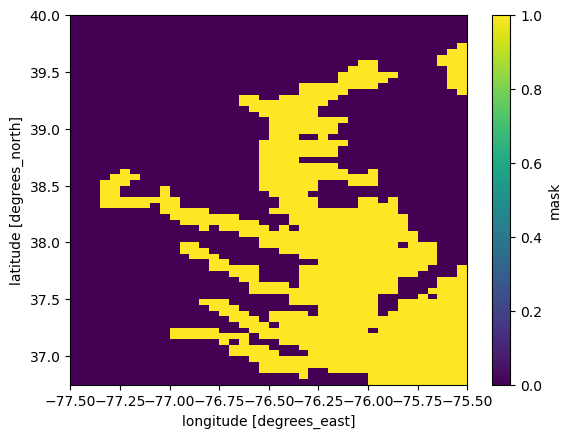

In [50]:
mask.plot()

### TODO 

if we keep this switch from this manual hot water calculation to pulling MHW pixels that have been identified from EJO's script

In [57]:
hot_water = geopolar_anom.where(geopolar > thresh)

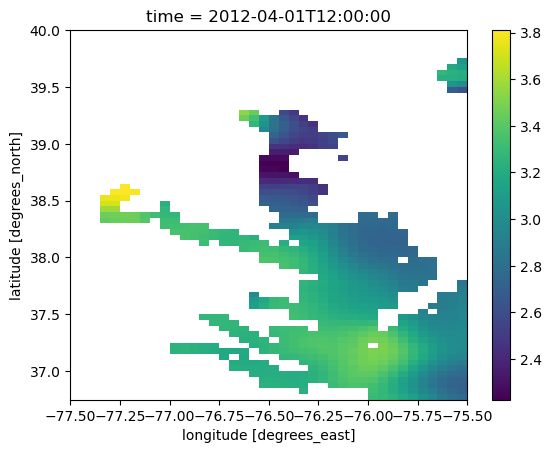

In [58]:
hot_water.isel(time=3500).plot()

Tested from: 0.75 -> 0.05 with a radius of 1. Then tried 0.05 and radius 15 to make sure it wasn't a big radius that was the more inclusive option.

In [72]:
Tracker = ocetrac.Tracker(hot_water, mask, radius=15, min_size_quartile=0.05, timedim='time', 
                          xdim='lon', ydim='lat', positive=True)
blobs = Tracker.track()

ValueError: No objects were detected. Try changing radius or min_size_quartile parameters.